In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete = load_umachine_sdss_with_meert15()
no_data_mask = np.isnan(full_sdss['Magr_tot_meert15'])

mask = ~no_data_mask & behroozi_complete
sdss = full_sdss[mask]

mask_sf = sdss['ssfr'] >= -10.75
mask_gv = (sdss['ssfr'] < -10.75) & (sdss['ssfr'] >= -11.25)
mask_q = (sdss['ssfr'] < -11.25)

import os
data_dirname = "/Users/aphearin/work/repositories/python/galsize_models/galsize_models/measurements/data/one_point_functions"

from galsize_models.measurements import tabulate_sdss_size_vs_stellar_mass
tabulate_sdss_size_vs_stellar_mass(data_dirname)

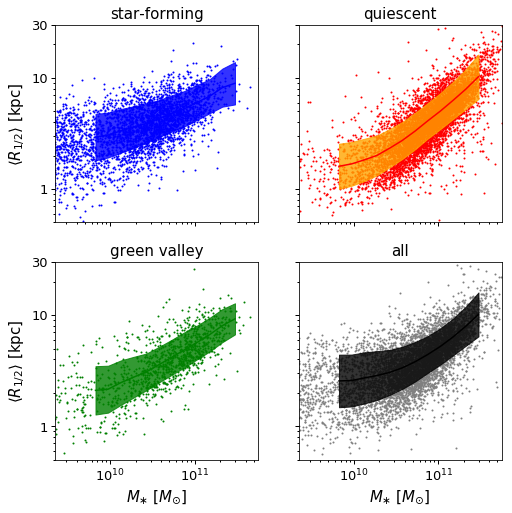

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, 
                                             figsize=(8, 8))

axes = (ax1, ax2, ax3, ax4)
for ax in axes:
    __=ax.loglog()

nskip = 20
__=ax1.scatter(10**sdss['sm'][mask_sf][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_sf][::nskip], 
              color='blue', s=1, label='')
__=ax2.scatter(10**sdss['sm'][mask_q][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_q][::nskip], 
              color='red', s=1, label='')
__=ax3.scatter(10**sdss['sm'][mask_gv][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_gv][::nskip], 
              color='green', s=1, label='')
__=ax4.scatter(10**sdss['sm'][::2*nskip], 
              sdss['r50_magr_kpc_meert15'][::2*nskip], 
              color='gray', s=1, label='')

xlabel, ylabel = r'$M_{\ast}$ $[M_{\odot}]$', r'$\langle R_{1/2}\rangle$ [kpc]'
xlabel3 = ax3.set_xlabel(xlabel); xlabel4 = ax4.set_xlabel(xlabel)
ylabel1 = ax1.set_ylabel(ylabel); ylabel3 = ax3.set_ylabel(ylabel)
title1 = ax1.set_title('star-forming'); title2 = ax2.set_title('quiescent')
title3 = ax3.set_title('green valley'); title4 = ax4.set_title('all')


from matplotlib import ticker
xticks,  yticks = (10**10, 10**11), (1, 10, 30)
xticklabels = (r'$10^{10}$', r'$10^{11}$')
xmin, xmax = 10**9.35, 10**11.75; ymin, ymax = 0.5, 30
for ax in axes:
    __=ax.set_xticks(xticks)
    __=ax.set_yticks(yticks)
    __=ax.set_xlim(xmin, xmax)
    __=ax.set_ylim(ymin, ymax)
    __=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    __=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
    __=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    __=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())
    __=ax.set_xticklabels(xticklabels)


logsm_bins = np.load(os.path.join(data_dirname, 'logsm_bins.npy'))
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])
sm_mids = 10**logsm_mids

mean_size_all = np.load(os.path.join(data_dirname, 'mean_size_all.npy'))
logmean_size_all = np.log10(mean_size_all)
scatter_size_all = np.load(os.path.join(data_dirname, 'scatter_size_all.npy'))
mean_size_lower = 10**(logmean_size_all - scatter_size_all)
mean_size_upper = 10**(logmean_size_all + scatter_size_all)
__=ax4.plot(sm_mids, mean_size_all, color='k')
__=ax4.fill_between(sm_mids, mean_size_lower, mean_size_upper, color='k', alpha=0.8)

mean_size_gv = np.load(os.path.join(data_dirname, 'mean_size_gv.npy'))
logmean_size_gv = np.log10(mean_size_gv)
scatter_size_gv = np.load(os.path.join(data_dirname, 'scatter_size_gv.npy'))
mean_size_lower = 10**(logmean_size_gv - scatter_size_gv)
mean_size_upper = 10**(logmean_size_gv + scatter_size_gv)
__=ax3.plot(sm_mids, mean_size_gv, color='green')
__=ax3.fill_between(sm_mids, mean_size_lower, mean_size_upper, color='green', alpha=0.8)

mean_size_sf = np.load(os.path.join(data_dirname, 'mean_size_sf.npy'))
logmean_size_sf = np.log10(mean_size_sf)
scatter_size_sf = np.load(os.path.join(data_dirname, 'scatter_size_sf.npy'))
mean_size_lower = 10**(logmean_size_sf - scatter_size_sf)
mean_size_upper = 10**(logmean_size_sf + scatter_size_sf)
__=ax1.plot(sm_mids, mean_size_sf, color='blue')
__=ax1.fill_between(sm_mids, mean_size_lower, mean_size_upper, color='blue', alpha=0.8)

mean_size_q = np.load(os.path.join(data_dirname, 'mean_size_q.npy'))
logmean_size_q = np.log10(mean_size_q)
scatter_size_q = np.load(os.path.join(data_dirname, 'scatter_size_q.npy'))
mean_size_lower = 10**(logmean_size_q - scatter_size_q)
mean_size_upper = 10**(logmean_size_q + scatter_size_q)
__=ax2.plot(sm_mids, mean_size_q, color='red')
__=ax2.fill_between(sm_mids, mean_size_lower, mean_size_upper, color='orange', alpha=0.8)


In [5]:
print(logsm_bins)

[  9.75   9.9   10.05  10.2   10.35  10.5   10.65  10.8   10.95  11.1
  11.25  11.4   11.55]
